In [1]:
import numpy as np
import matplotlib.pyplot as plt

from matplotlib.table import Table

In [2]:
WORLD_SIZE = 4

# left, up, right, down
ACTIONS = [
    np.array([0, -1]),
    np.array([-1, 0]),
    np.array([0, 1]),
    np.array([1, 0])]

ACTION_PROB = 0.25

In [3]:
def is_terminal(state):
    x, y = state
    return (x == 0 and y == 0) or (x == WORLD_SIZE-1 and y == WORLD_SIZE-1)

def step(state, action):
    if is_terminal(state):
        return state, 0

    next_state = (np.array(state) + action).tolist()
    x, y = next_state

    if x < 0 or x >= WORLD_SIZE or y < 0 or y >= WORLD_SIZE:
        next_state = state
    return next_state, -1

def compute_state_value(in_place=True, discount=1.0):
    new_state_values = np.zeros((WORLD_SIZE, WORLD_SIZE))
    iteration = 0
    while True:
        if in_place:
            state_values = new_state_values
        else:
            state_values = new_state_values.copy()
        old_state_values = state_values.copy()

        for i in range(WORLD_SIZE):
            for j in range(WORLD_SIZE):
                value = 0
                for action in ACTIONS:
                    (next_i, next_j), reward = step([i, j], action)
                    value += ACTION_PROB * (reward + discount * state_values[next_i, next_j])
                new_state_values[i, j] = value
        
        max_delta_value = abs(old_state_values - new_state_values).max()
        if max_delta_value < 1e-4:
            break
        iteration += 1

    return new_state_values, iteration

In [4]:
def draw_image(image):
    fig, ax = plt.subplots()
    ax.set_axis_off()
    tb = Table(ax, bbox=[0, 0, 1, 1])

    nrows, ncols = image.shape
    width, height = 1.0 / ncols, 1.0 / nrows

    # Add cells
    for (i, j), val in np.ndenumerate(image):
        tb.add_cell(i, j, width, height, text=val, loc='center')
    
    # Row and column labels...
    for i in range(nrows):
        tb.add_cell(i, -1, width, height, text=i+1, loc='right', edgecolor='none')
    for i in range(ncols):
        tb.add_cell(-1, i, width, height/2, text=i+1, loc='center', edgecolor='none')
    
    ax.add_table(tb)
    plt.show()

In [5]:
def figure_4_1():
    _, async_iteration = compute_state_value(in_place=True)
    values, sync_iteration = compute_state_value(in_place=False)
    draw_image(np.round(values, decimals=2))
    print('In-place: {} iterations'.format(async_iteration))
    print('Synchronous: {} iterations'.format(sync_iteration))

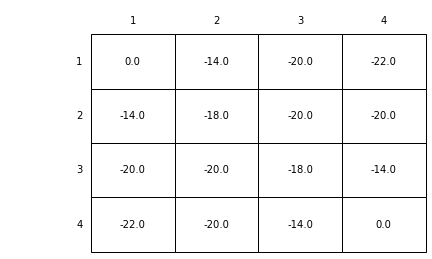

In-place: 113 iterations
Synchronous: 172 iterations


In [6]:
figure_4_1()

## Exercise 4.2

In [7]:
WORLD_SIZE = (5, 4)

state_12 = [3, 0]
state_14 = [3, 2]
state_15 = [4, 1]

def is_terminal(state):
    y, x = state
    return (y == 0 and x == 0) or (y == WORLD_SIZE[0]-2 and x == WORLD_SIZE[1]-1)

def is_wall(state):
    y, x = state
    return (y < 0 or x < 0 or y >= WORLD_SIZE[0] or x >= WORLD_SIZE[1]) \
        or (y == WORLD_SIZE[0]-1 and x != 1)
    
def step(state, action):
    if is_terminal(state):
        return state, 0

    if state == state_15 and action is ACTIONS[0]:    # state 15 -> left
        next_state = state_12
    elif state == state_15 and action is ACTIONS[2]:  # state 15 -> right
        next_state = state_14
    else:
        next_state = (np.array(state) + action).tolist()
    y, x = next_state

    if is_wall(next_state):
        next_state = state
    return next_state, -1

def compute_state_value(in_place=True, discount=1.0):
    new_state_values = np.zeros(WORLD_SIZE)
    iteration = 0
    while True:
        if in_place:
            state_values = new_state_values
        else:
            state_values = new_state_values.copy()
        old_state_values = state_values.copy()

        for i in range(WORLD_SIZE[0]):
            for j in range(WORLD_SIZE[1]):
                if i == 4 and j != 1:
                    continue
                value = 0
                for action in ACTIONS:
                    (next_i, next_j), reward = step([i, j], action)
                    value += ACTION_PROB * (reward + discount * state_values[next_i, next_j])
                new_state_values[i, j] = value
        
        max_delta_value = abs(old_state_values - new_state_values).max()
        if max_delta_value < 1e-4:
            break
        iteration += 1
    
    return new_state_values, iteration

In [8]:
def exercise_4_2():
    _, async_iteration = compute_state_value(in_place=True)
    values, sync_iteration = compute_state_value(in_place=False)
    draw_image(np.round(values, decimals=2))
    print('In-place: {} iterations'.format(async_iteration))
    print('Synchronous: {} iterations'.format(sync_iteration))

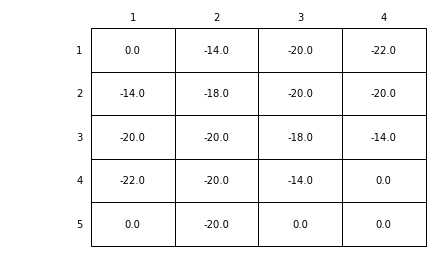

In-place: 113 iterations
Synchronous: 172 iterations


In [9]:
exercise_4_2()